In [1]:
import numpy as np
import corner
import emcee
import matplotlib.pyplot as plt

In [2]:
read = emcee.backends.HDFBackend("jam_axi_rms.h5")

In [3]:
#Get all chains of Emcee.
#Frist input is the iteration, and second the walker number, e.g., 
#chain[10][13] get the walker number 13 in the 10 iteration.

chain = read.get_chain()   

In [4]:
#Get all log_probabilities
#Frist input is the iteration, and second the walker number, e.g., 
#chain[10][13] get the walker number 13 in the 10 iteration.

log_prob = read.get_log_prob()
print(np.where(log_prob == log_prob.max()))
print(log_prob.max())

(array([7128, 7129, 7130, 7131, 7132]), array([111, 111, 111, 111, 111]))
-11.52948909043138


In [5]:
#Get the number of accepted values
#E.g, accepted[10] = 2, means walker 10 was accepted 2 times

accepted = read.accepted
print("Number of accepted walkers:",np.count_nonzero(accepted))
accepted

Number of accepted walkers: 120


array([1177., 1128., 1126., 1014., 1225., 1095.,  973., 1131., 1185.,
       1102., 1112., 1087., 1139., 1091., 1129., 1137., 1169., 1137.,
       1119., 1122., 1147., 1127., 1164.,   42.,  101., 1168., 1103.,
        961., 1131., 1096., 1139., 1060., 1142., 1165., 1151.,   30.,
       1092., 1137., 1098., 1128., 1173., 1168., 1148., 1142., 1084.,
       1109., 1158., 1144., 1118.,  225., 1135., 1143., 1134., 1066.,
       1139.,  276., 1142.,   48.,  940., 1161., 1116., 1128., 1124.,
       1161., 1068.,   77.,  194., 1093., 1109., 1189., 1173., 1138.,
       1087., 1124.,  961., 1076., 1117., 1127., 1075.,   57., 1134.,
       1144.,  473., 1092., 1171., 1095., 1155., 1129., 1106., 1120.,
       1075., 1120., 1101.,  433.,   47., 1098., 1112., 1092., 1088.,
       1094., 1194.,   87., 1109., 1125.,  682., 1098., 1114.,  708.,
       1129., 1109., 1088., 1100., 1143., 1174., 1216., 1076.,  184.,
        957., 1108., 1192.])

[485.97435967 398.99305612 354.07431683 153.13749182]
flat chain shape: (866280, 4)
flat log prob shape: (866280,)


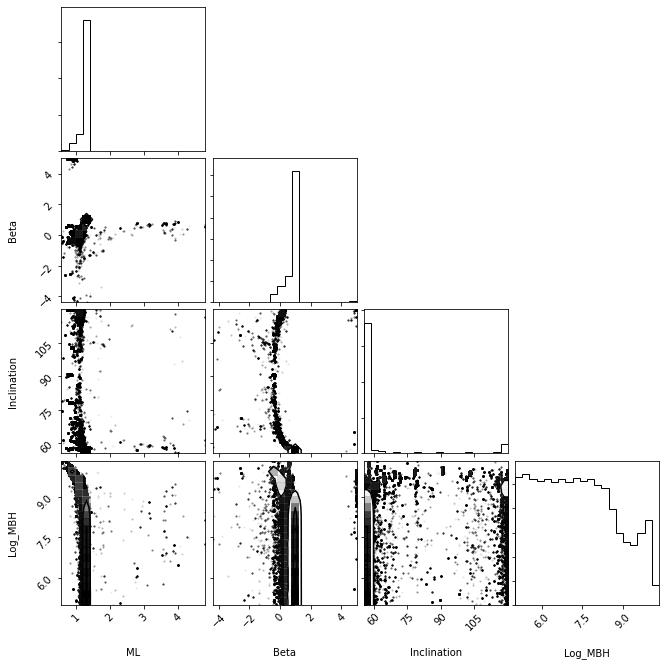

In [6]:
#Corner plots

labels = ["ML", "Beta", "Inclination", "Log_MBH"]

tau = read.get_autocorr_time(tol=0)
print(tau)
samples = read.get_chain(flat=True)
log_prob_samples = read.get_log_prob(flat=True)


print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))

all_samples = np.concatenate(
    (samples, log_prob_samples[:, None]), axis=1
)

labels += ["log prob"]

corner.corner(samples, labels=labels);

In [7]:
tau = read.get_autocorr_time()

AutocorrError: The chain is shorter than 50 times the integrated autocorrelation time for 4 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 144;
tau: [485.97435967 398.99305612 354.07431683 153.13749182]

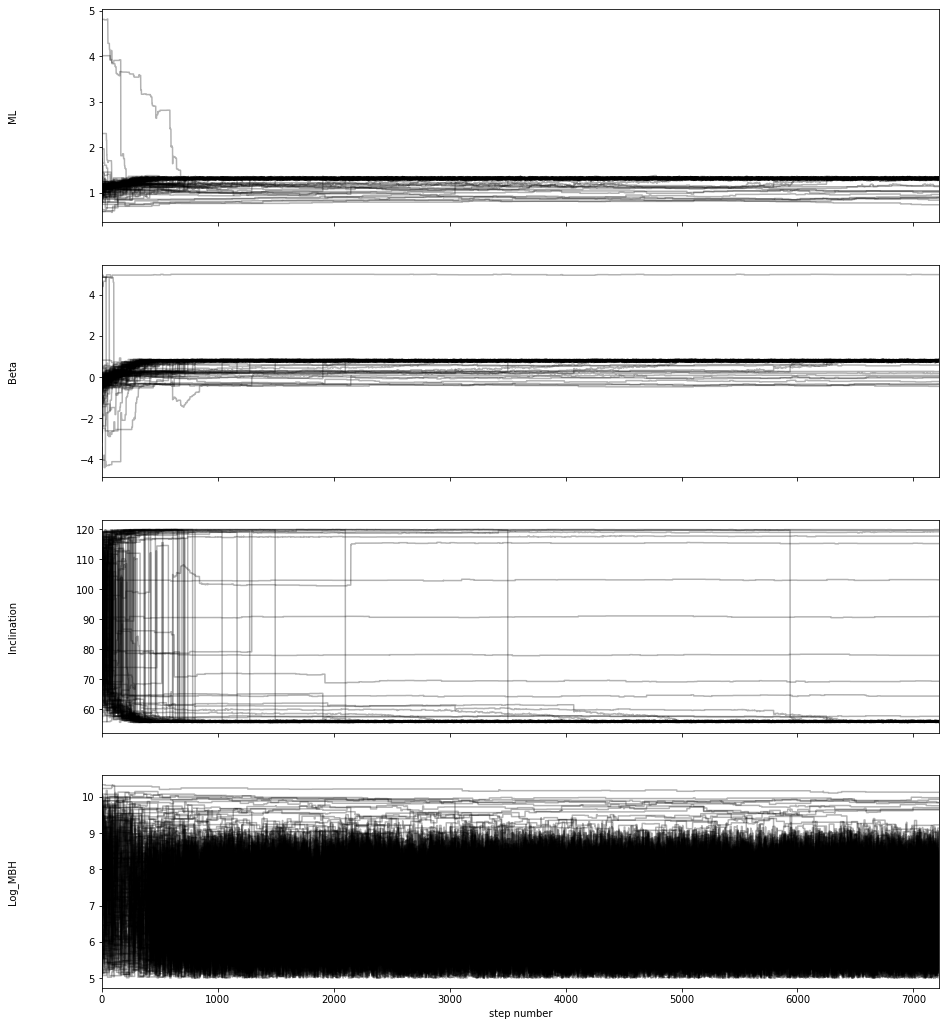

In [8]:
#Walke of each walker
fig, axes = plt.subplots(len(labels)-1, figsize=(15, 18), sharex=True)
samples = read.get_chain()

for i in range(len(labels)-1):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [9]:
it, accep_tot, time, accep_100 = np.loadtxt("Output_LogFile.txt", unpack=True)

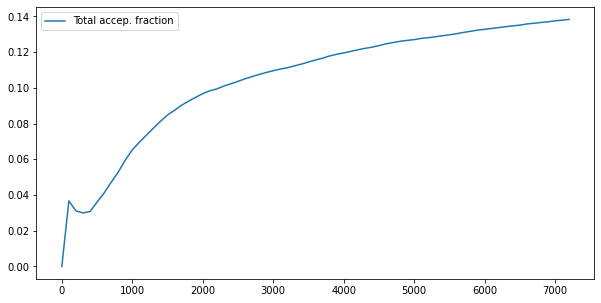

In [12]:
#Plot accep_tot vs it
plt.figure(figsize=(10,5))

plt.plot(it, accep_tot, label="Total accep. fraction")
plt.legend()

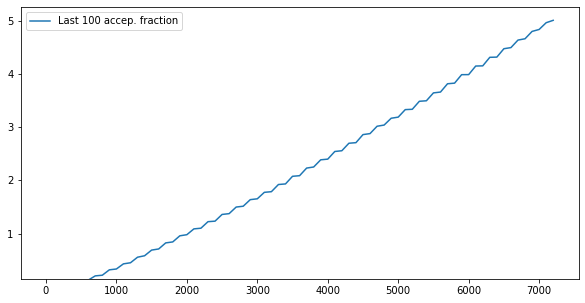

In [13]:
#Plot accep_100 vs it
plt.figure(figsize=(10,5))

plt.plot(it, accep_100, label="Last 100 accep. fraction")
plt.ylim(0.15,)
plt.legend()